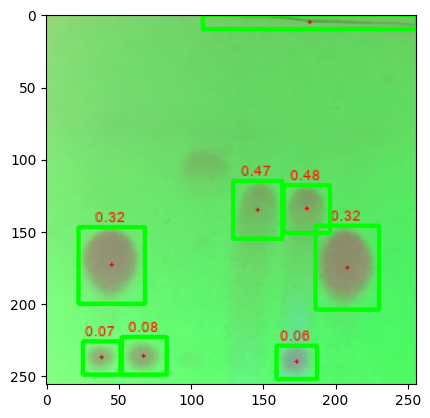

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def TLC(image_path):

    img = cv2.imread(image_path)

    
    resized_img = cv2.resize(img, (256, 256))


    gray_image = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)


    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

  
    initial_threshold = 16
    initial_min_area_threshold = 100
    num_rectangles = 0
    min_required_rectangles = 7


    while num_rectangles < min_required_rectangles:
     
        threshold = initial_threshold
     
        min_area_threshold = initial_min_area_threshold

        high_contrast_areas = gradient_magnitude > threshold

        contours, _ = cv2.findContours(high_contrast_areas.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


        num_rectangles = 0
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > min_area_threshold:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(resized_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

                center_x = x + w // 2
                center_y = y + h // 2

        
                cv2.circle(resized_img, (center_x, center_y), 1, (0, 0, 255), -1)


                y_normalized = 1 - center_y / 256


                pil_img = Image.fromarray(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
                draw = ImageDraw.Draw(pil_img)
                font = ImageFont.truetype("arial.ttf", 10)  # Adjust the font and size as needed
                text = f'{y_normalized:.2f}'
                text_bbox = draw.textbbox((0, 0), text, font=font)
                text_x = x + (w - (text_bbox[2] - text_bbox[0])) // 2
                text_y = y - (text_bbox[3] - text_bbox[1]) - 6
                draw.text((text_x, text_y), text, font=font, fill=(255, 20, 0))

        
                resized_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

                num_rectangles += 1

        initial_min_area_threshold -= 1  
        
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.show()

TLC("yes5.jpeg")